## Diferencias finitas: difusión
### Juan S. Hincapié - Carlos Duque-Daza


### Esquemas espaciales

$$
\begin{aligned}
& \text{FFD:} \frac{du}{dx} \approx \frac{u_{i+1}-u_{i}}{\Delta x} +  O(\Delta x) \\
& \text{BFD:}    \frac{du}{dx} \approx \frac{u_{i}-u_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{CFD:} \frac{du}{dx} \approx \frac{u_{i+1}-u_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$

Esta vez usaremos un nuevo esquema espacial que nos servirá para discretizar derivadas paraciales de segundo orden:

$$
  \text{CFD:} \frac{d^2u}{dx^2} \approx \frac{u_{i+1} - 2u_{i} + u_{i-1}}{\Delta x^2} +  O(\Delta x)^2   
$$

### Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{du}{dt} = \phi (t,x,u)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \phi_i^{n} (t,x,u)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \phi_i^{n+1} (t,x,u)
$$

Esquema smiimplícito (Crank-Nicolson):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \frac{1}{2}\phi_i^{n+1} (t,x,u)  + \frac{1}{2}\phi_i^{n} (t,x,u)
$$

### Caso de estudio

$$
    \frac{\partial u}{\partial t}  = \nu \frac{\partial^2 u}{\partial x^2} 
$$

Las condiciones de frontera:
* $u(t,0) = 1$ y  $u(t,2) = 1$

Condiciones iniciales:
* $u = 2$ para $0.5 \leq x \leq 1.0$ y $u =1$ en el resto del dominio


### Discretización

Recordemos nuestro dominio espacial 1D con 7 nodos:

<div align='center'> 0--------1--------2--------3--------4--------5--------6</div><br>

Para discretizar la derivada espacial de segundo orden, escogemos el esquema centrado (el nuevo que acabamos de ver) y un esquema temporal semi-implícito.

$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \frac{\nu}{2}\frac{u^{n+1}_{i+1}-2u^{n+1}_{i}+u^{n+1}_{i-1}}{\Delta x^2} + \frac{\nu}{2}\frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^2}
$$



### Arreglamos nuestra ecuación discreta

Todo lo desconocido lo dejamos al lado izquierdo de la ecuación, mientras que lo conocido lo dejaremos al lado derecho. Además, por abreviar notación, $ F = \frac{\nu \Delta t}{\Delta x^2}$

\begin{align*}
    & u^{n+1}_{i} - \frac{F}{2}\left(u^{n+1}_{i+1} - 2 u^{n+1}_{i} + u^{n+1}_{i-1}\right) = \\ 
    & u^{n}_{i} + \frac{F}{2}\left(u^{n}_{i+1} - 2 u^{n}_{i} + u^{n}_{i-1} \right)
\end{align*}

Multiplicamos por 2 y agrupamos términos:
\begin{align*}
    & - F u^{n+1}_{i-1} + 2(1+F) u^{n+1}_{i} - F u^{n+1}_{i+1} = \\ 
    &  F u^{n}_{i-1} + 2(1-F) u^{n}_{i} + F u^{n}_{i+1} 
\end{align*}

Obentemos algunas ecuaciones:
\begin{align*}
    & i=1 \rightarrow - F u^{n+1}_{0} + 2(1+F) u^{n+1}_{1} - F u^{n+1}_{2} =  F u^{n}_{0} + 2(1-F) u^{n}_{1} + F u^{n}_{2}  \\
    & i=2 \rightarrow - F u^{n+1}_{1} + 2(1+F) u^{n+1}_{2} - F u^{n+1}_{3} =  F u^{n}_{1} + 2(1-F) u^{n}_{2} + F u^{n}_{3}  \\
    & \vdots \\
    & i=5 \rightarrow - F u^{n+1}_{4} + 2(1+F) u^{n+1}_{5} - F u^{n+1}_{6} =  F u^{n}_{4} + 2(1-F) u^{n}_{5} + F u^{n}_{6}  \\
\end{align*}


Revisamos con más detalle aquellos términos que, a pesar de ser evaluados en el futuro, se conocen, y de este modo poderlos pasar al lado derecho:
\begin{align*}
    & i=1 \rightarrow  2(1+F) u^{n+1}_{1} - F u^{n+1}_{2} = 2 F u^{n}_{0} + 2(1-F) u^{n}_{1} + F u^{n}_{2} \\
     & i=2 \rightarrow - F u^{n+1}_{1} + 2(1+F) u^{n+1}_{2} - F u^{n+1}_{3} =  F u^{n}_{1} + 2(1-F) u^{n}_{2} + F u^{n}_{3}  \\
    & \vdots \\
    & i=5 \rightarrow - F u^{n+1}_{4} + 2(1+F) u^{n+1}_{5}  = F u^{n}_{4} + 2(1-F) u^{n}_{5} + 2F u^{n}_{6} \\
\end{align*}

### Matrices de coeficientes y vector de cargas

<div align='justify'> ¿Es este un sistem de ecauciones lineales? Sí, afortunadamente es un sistema de ecuaciones lineales. Por tal motivo, se puede directamente a la representación matricial del tipo $Ax=b$, sin necesidad de hacer una linealización.</div>

$$
\left[\begin{array}{ccccccc}
2(1+F) & -F & 0 & 0 & 0   \\
-F & 2(1+F) & -F & 0 & 0   \\
0 & -F & 2(1+F) & -F & 0   \\
0 & 0 & -F & 2(1+F) & -F   \\
0 & 0 & 0 & -F & 2(1+F)   \\
\end{array}\right]\cdot
\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}\\
u_{4}\\
u_{5}
\end{array}\right] ^{n+1} = 
\left[\begin{array}{c}
2 F u^{n}_{0} + 2(1-F) u^{n}_{1} + F u^{n}_{2} \\
F u^{n}_{1} + 2(1-F) u^{n}_{2} + F u^{n}_{3}  \\
F u^{n}_{2} + 2(1-F) u^{n}_{3} + F u^{n}_{4}  \\
F u^{n}_{3} + 2(1-F) u^{n}_{4} + F u^{n}_{5}  \\
F u^{n}_{4} + 2(1-F) u^{n}_{5} + 2F u^{n}_{6} \\
\end{array}\right]
$$


In [5]:
import numpy as np
import matplotlib.pyplot as plt

<div align='justify'> Empezamos haciendo nuestro pre-procesamiento, el de siempre: crear discretización espacial y temporal, luego incluir las condiciones de frontera y de borde. Recordar que ahora estamos usando np.ones en vez de np.zeros, dado que nuestras condiciones iniciales nos lo exigen, al igual que las condiciones de frontera. Al final revisamos si están bien programadas las condiciones iniciales.</div>

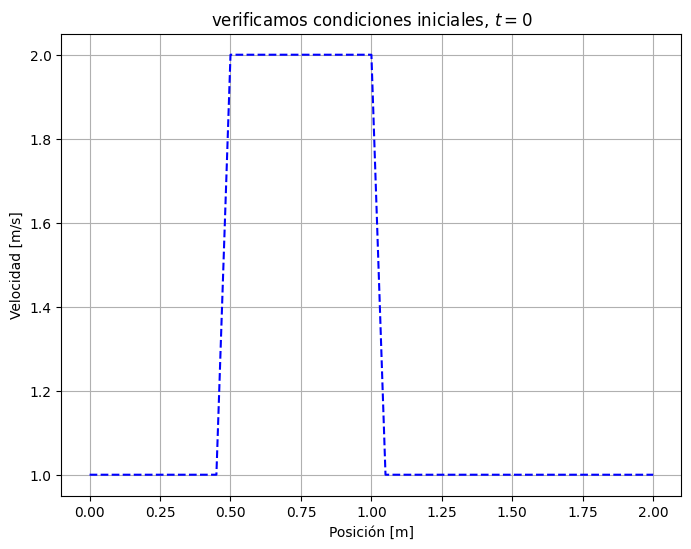

In [55]:
# Paso 00: discretizar el dominio espacial

# Paso 01: discretizar el dominio temporal


# Paso 03: crear vector de velocidad almacenar
# el valor de la velocidad en cada punto discreto
# tanto en futuro como en presente, ¡¡CON UNOS!!


# Paso 04: incluimos condiciones inciales


# Paso 05: verificar condiciones iniciales
plt.figure(1, figsize=(8,6))
plt.plot(x, up, "--b")
plt.title("verificamos condiciones iniciales, $t=0$")
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.grid()
plt.show()

<div align='justify'>Recordemos nuestro sistema de ecuaciones para poderla programar.</div>

$$
\left[\begin{array}{ccccccc}
2(1+F) & -F & 0 & 0 & 0   \\
-F & 2(1+F) & -F & 0 & 0   \\
0 & -F & 2(1+F) & -F & 0   \\
0 & 0 & -F & 2(1+F) & -F   \\
0 & 0 & 0 & -F & 2(1+F)   \\
\end{array}\right]\cdot
\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}\\
u_{4}\\
u_{5}
\end{array}\right] ^{n+1} = 
\left[\begin{array}{c}
2 F u^{n}_{0} + 2(1-F) u^{n}_{1} + F u^{n}_{2} \\
F u^{n}_{1} + 2(1-F) u^{n}_{2} + F u^{n}_{3}  \\
F u^{n}_{2} + 2(1-F) u^{n}_{3} + F u^{n}_{4}  \\
F u^{n}_{3} + 2(1-F) u^{n}_{4} + F u^{n}_{5}  \\
F u^{n}_{4} + 2(1-F) u^{n}_{5} + 2F u^{n}_{6} \\
\end{array}\right]
$$

<div align='justify'>Sabemos que las únicas ecuaciones "diferentes" a las demás son la primera y la última, dado que incluyen valores nodales conocidos. Esto debe estar reflejado en nuestra ecaución</div>

In [56]:
# Paso 06: crear función para llenar la matriz
def matrizA(A, rows, cols, F):

    return invA, A

# Paso 07: crear función para llenar el vector de cargas
def vectorB(incog,F,up):

     return b
    

<div align='justify'>¿La matriz A es de coeficientes constantes? ¿Qué ventajas trae que sea de coefiecientes constantes?</div>

In [57]:
# Paso 08: creamos una matriz y vector para almacenar los coeficientes


# Paso 09: constantes del problema


In [58]:
# Paso 10: resolvemos todo el problema 


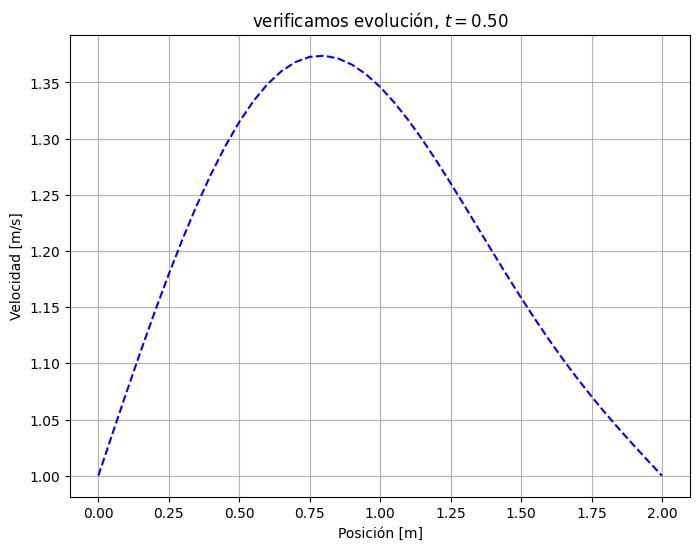

In [59]:
# Paso 11: plotear
plt.figure(2, figsize=(8,6))
plt.plot(x, uf, "--b")
plt.title("verificamos evolución, $t={:.2f}$".format(t[-1]))
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.grid()
plt.show()

**Actividad 01:** crear una función que resuelva la ecuación de difusión en 1D, donde los parámetros que pida sean:
1. El coeficiente de difusión $\nu$
1. El número de Fourier $F$
1. El paso espacial $\Delta x$ 
1. Longitud del dominio $L$
1. El tiempo final de la simulación $t_f$

In [43]:
def matrizA(A, rows, cols, F):
    for j in range(0,rows):
        for i in range(0, cols):
            if j==i:
                A[j,i] = 2*(1+F)    
                if j>0:
                    A[j,i-1] = -F
                if j < rows-1:
                    A[j,i+1] = -F

    invA = np.linalg.inv(A)
    return invA, A

def vectorB(incog,F,up):
     b = np.zeros(incog)
     b[0] = 2*F*up[0] + 2*(1-F)*up[1] + F*up[2]
     b[-1] = F*up[-3] + 2*(1-F)*up[-2] + 2*F*up[-1]
     for k in range(1, len(b)-1):
        b[k] = F*up[k] + 2*(1-F)*up[k+1] + F*up[k+2]
     return b

def solDiffusionCDCK(nu, F, dx, L, tf, fig):


    plt.figure(fig, figsize=(8,6))
    plt.plot(x, uf, "--b")
    plt.title("verificamos evolución, $t={:.2f}$".format(t[-1]))
    plt.xlabel("Posición [m]")
    plt.ylabel("Velocidad [m/s]")
    plt.grid()
    plt.show()

    return uf

**Actividad 02:** solucionar el problema de difusión para $t_f=0.01$, $t_f=0.1$ y luego para $t_f=0.5$ usando un número de Fourier igual a 1. ¿En qué consiste el fenómenos de difusión? ¿Cómo lo describiría con sus propias palabras?

In [78]:
#El solucionador de la ecuación de difusión requiere 6 argumentos:
# nu es el coeficiente de difusión, para este caso m2/s
# F es el número de Fourier que se desea
# dx es el paso espacial
# L es la longitud total del dominio 1D
# tf es el tiempo final de simulación
# fig es el número de la figura que se quiere plotear


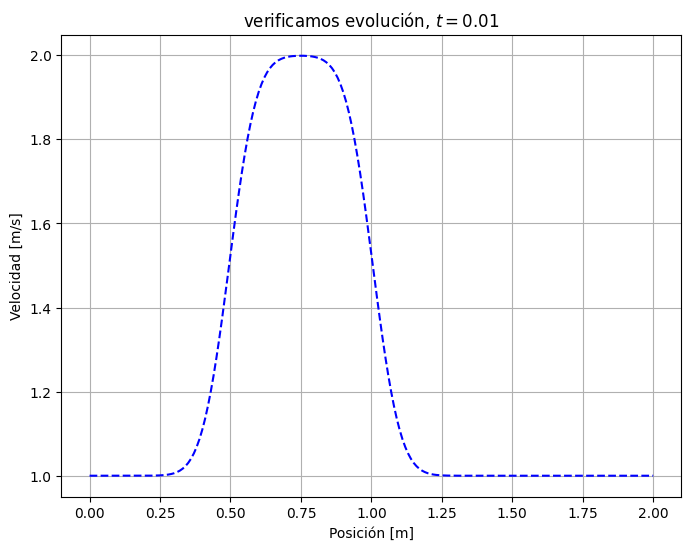

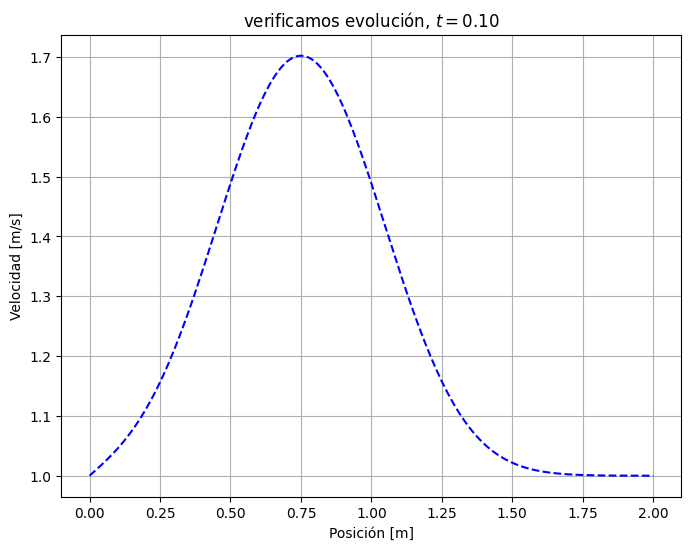

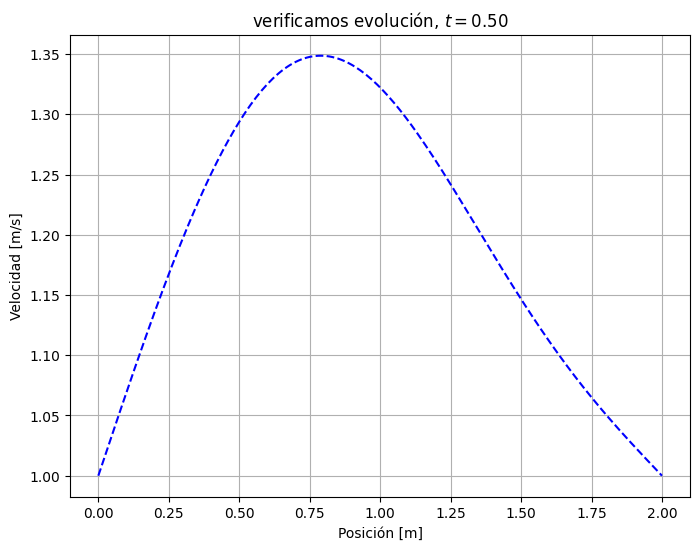

**Actividad 03:** solucionar el problema de difusión para $t_f=0.01$, $t_f=0.1$ y luego para $t_f=0.5$ usando un número de Fourier igual a 5. ¿Qué ocurre en $t_f=0.01$?

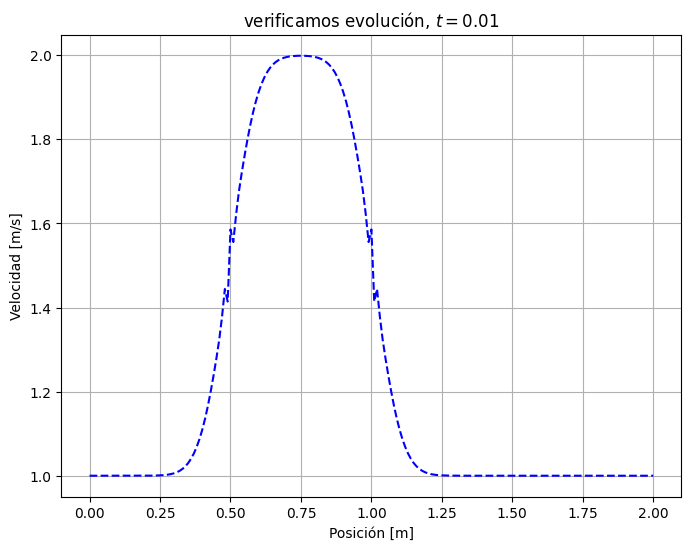

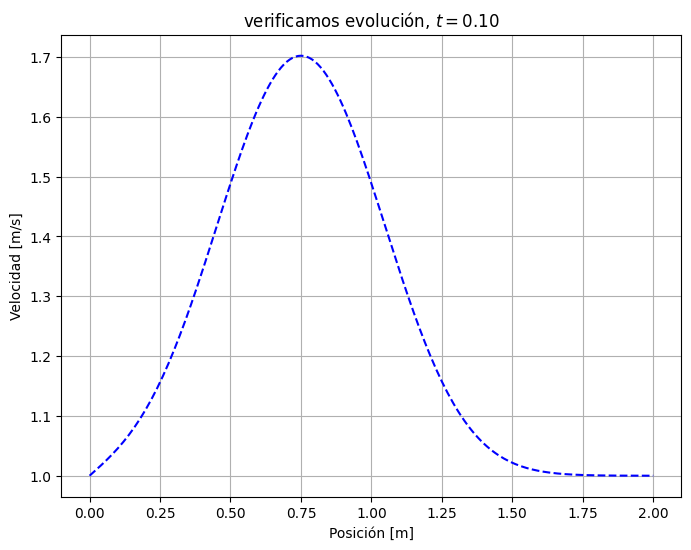

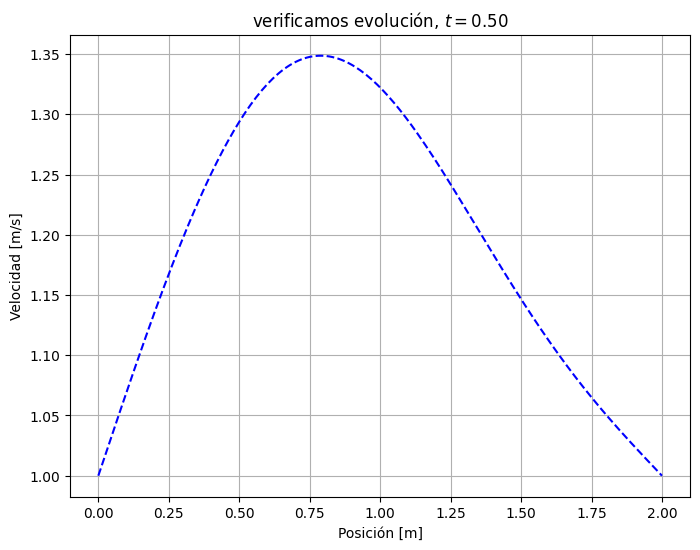